In [23]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the dataset
df = pd.read_csv("Index_Crimes_by_County_and_Agency__Beginning_1990.csv")

In [25]:
# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

In [26]:
# Drop rows where all values are NaN
df.dropna(how='all', inplace=True)

In [27]:
# Handle missing values by filling NaN values with appropriate values
df.fillna(0, inplace=True)

In [28]:
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   County          Agency  Year  Months Reported  Index Total  Violent Total  \
0  Albany  Albany City PD  1990              0.0         6635           1052   
1  Albany  Albany City PD  1991              0.0         7569           1201   
2  Albany  Albany City PD  1992              0.0         7791           1150   
3  Albany  Albany City PD  1993              0.0         7802           1238   
4  Albany  Albany City PD  1994              0.0         8648           1380   

   Murder  Rape  Robbery  Aggravated Assault  Property Total  Burglary  \
0       9    82      386                 575            5583      1884   
1      11    71      487                 632            6368      1988   
2       8    77      467                 598            6641      2246   
3       6    59      481                 692            6564      2063   
4      13    79      542                 746            7268      2227   

   Larceny  Motor Vehicle Theft             Region  

In [29]:
print("Dataset Info:\n")
print(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               23143 non-null  object 
 1   Agency               23143 non-null  object 
 2   Year                 23143 non-null  int64  
 3   Months Reported      23143 non-null  float64
 4   Index Total          23143 non-null  int64  
 5   Violent Total        23143 non-null  int64  
 6   Murder               23143 non-null  int64  
 7   Rape                 23143 non-null  int64  
 8   Robbery              23143 non-null  int64  
 9   Aggravated Assault   23143 non-null  int64  
 10  Property Total       23143 non-null  int64  
 11  Burglary             23143 non-null  int64  
 12  Larceny              23143 non-null  int64  
 13  Motor Vehicle Theft  23143 non-null  int64  
 14  Region               23143 non-null  object 
dtypes: float64(1), int64(

In [30]:
# Define list of crime columns
crime_cols = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault',
              'Burglary', 'Larceny', 'Motor Vehicle Theft']

In [31]:
print("\nSummary Statistics:\n")
print(df[crime_cols].describe())


Summary Statistics:

             Murder          Rape       Robbery  Aggravated Assault  \
count  23143.000000  23143.000000  23143.000000        23143.000000   
mean       2.040574      9.920754     76.613576          107.462775   
std       18.887724     44.959342    845.512371          799.090468   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.000000      0.000000      0.000000            1.000000   
50%        0.000000      1.000000      1.000000            6.000000   
75%        0.000000      4.000000      5.000000           26.000000   
max      786.000000   1159.000000  36341.000000        24828.000000   

           Burglary        Larceny  Motor Vehicle Theft  
count  23143.000000   23143.000000         23143.000000  
mean     192.563324     751.609558           108.538910  
std     1093.678202    3632.098133          1138.639483  
min        0.000000       0.000000             0.000000  
25%        3.000000      20.000000             0

In [32]:
# Convert columns to appropriate data types
df['Year'] = df['Year'].astype(int)
df['Index Total'] = df['Index Total'].astype(int)
df['Violent Total'] = df['Violent Total'].astype(int)
df['Property Total'] = df['Property Total'].astype(int)

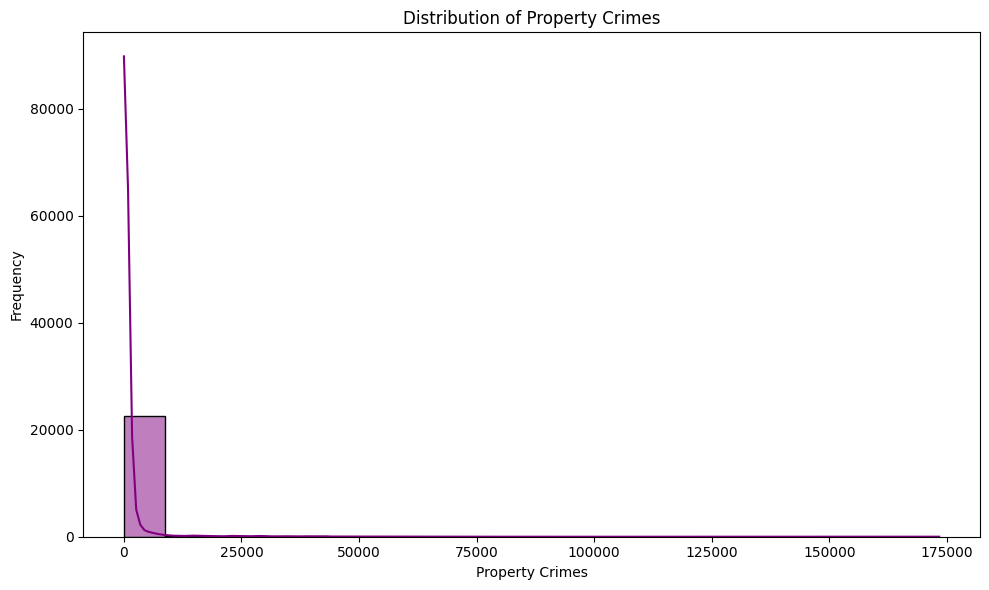

In [33]:
# Histogram: Distribution of Property Crimes
plt.figure(figsize=(10, 6))
sns.histplot(df['Property Total'], bins=20, kde=True, color='purple')
plt.title('Distribution of Property Crimes')
plt.xlabel('Property Crimes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

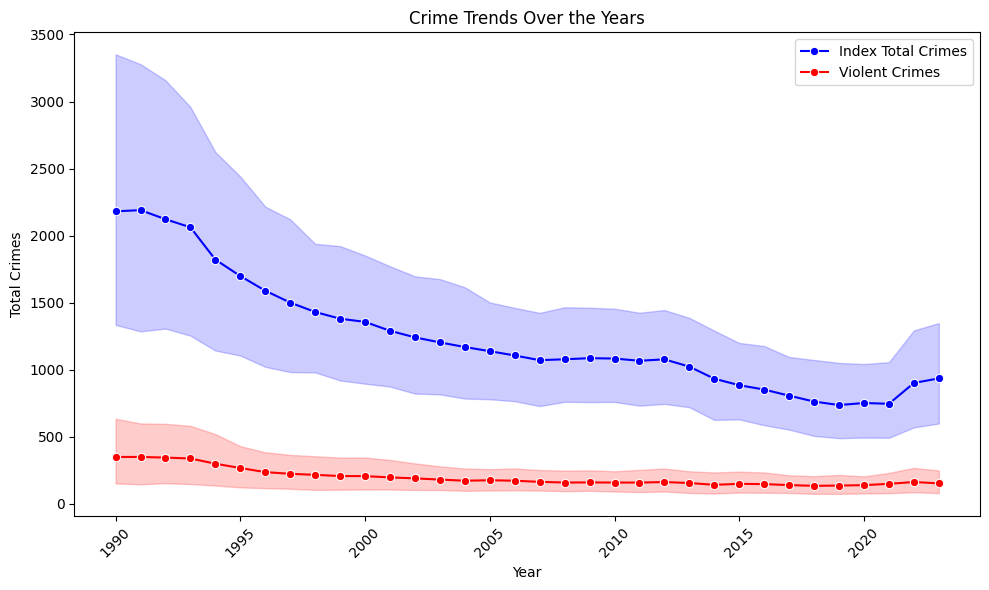

In [34]:
# Line Graph: Crime trends over the years for index and violent crimes
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Index Total', label='Index Total Crimes', marker='o',linestyle='-',color='blue')
sns.lineplot(data=df, x='Year', y='Violent Total', label='Violent Crimes', marker='o',linestyle='-',color='red')
plt.title('Crime Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

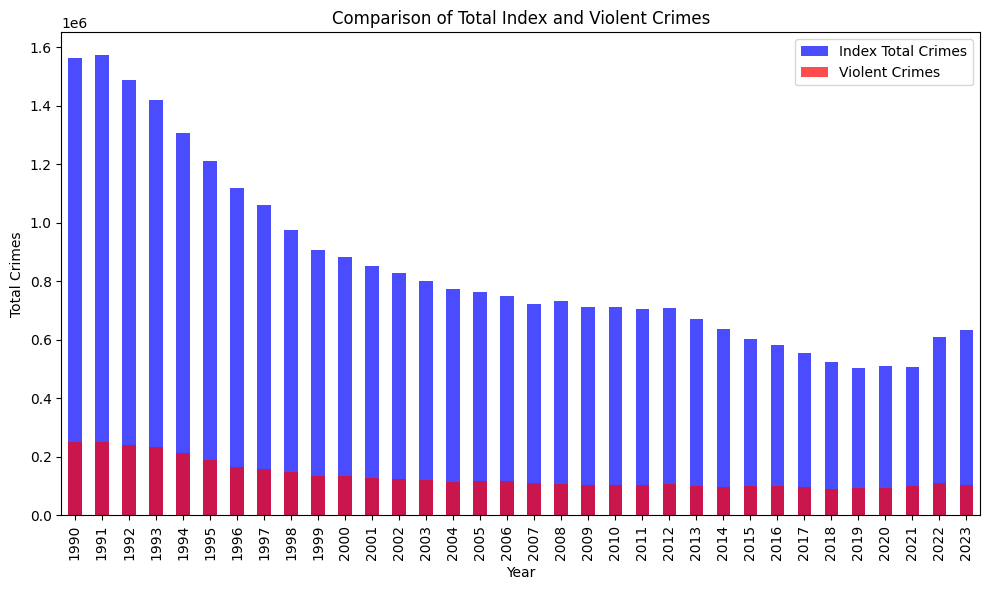

In [35]:
# Bar Graph: Comparison of total index and violent crimes
plt.figure(figsize=(10, 6))
df.groupby('Year')['Index Total'].sum().plot(kind='bar', label='Index Total Crimes', color='blue', alpha=0.7)
df.groupby('Year')['Violent Total'].sum().plot(kind='bar', label='Violent Crimes', color='red', alpha=0.7)
plt.title('Comparison of Total Index and Violent Crimes')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.legend()
plt.tight_layout()
plt.show()

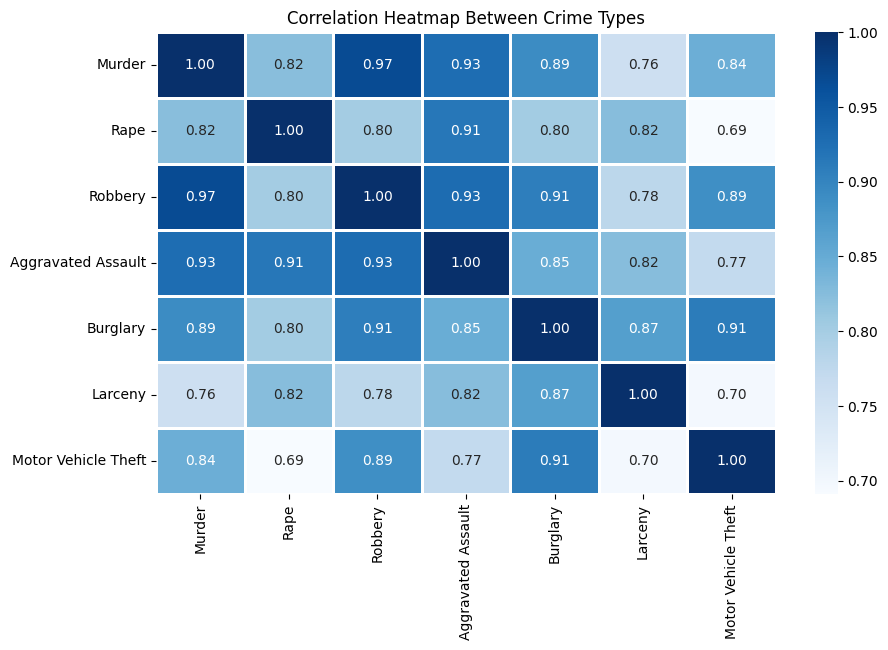

In [36]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[crime_cols].corr(), annot=True, cmap="Blues", fmt=".2f",linewidths=0.8)
plt.title("Correlation Heatmap Between Crime Types")
plt.show()

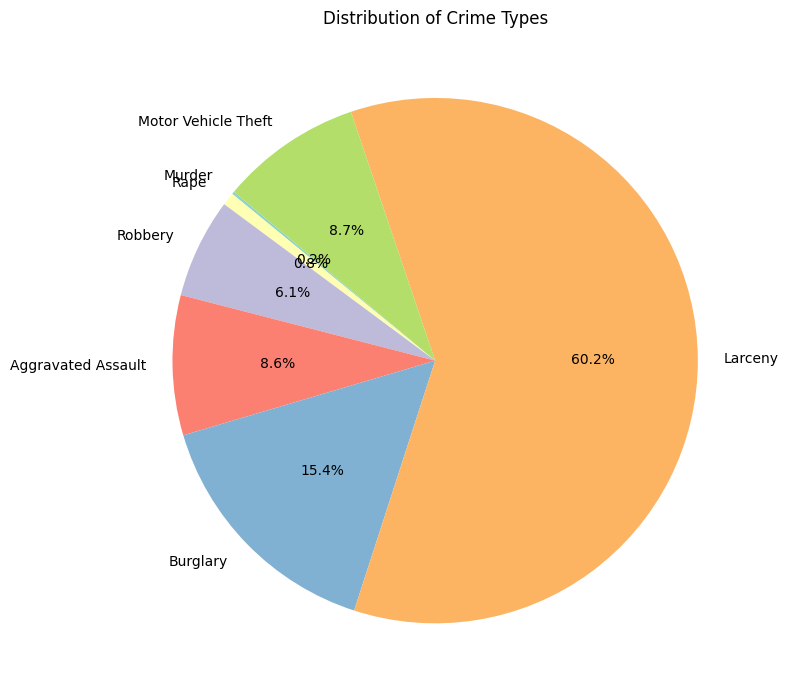

In [37]:
# Pie Chart: Distribution of Crime Types (Murder, Rape, Robbery, etc.)
crime_types = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary', 'Larceny', 'Motor Vehicle Theft']
crime_totals = df[crime_types].sum()

plt.figure(figsize=(8, 8))
plt.pie(crime_totals, labels=crime_types, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(crime_types)))
plt.title('Distribution of Crime Types')
plt.tight_layout()
plt.show()

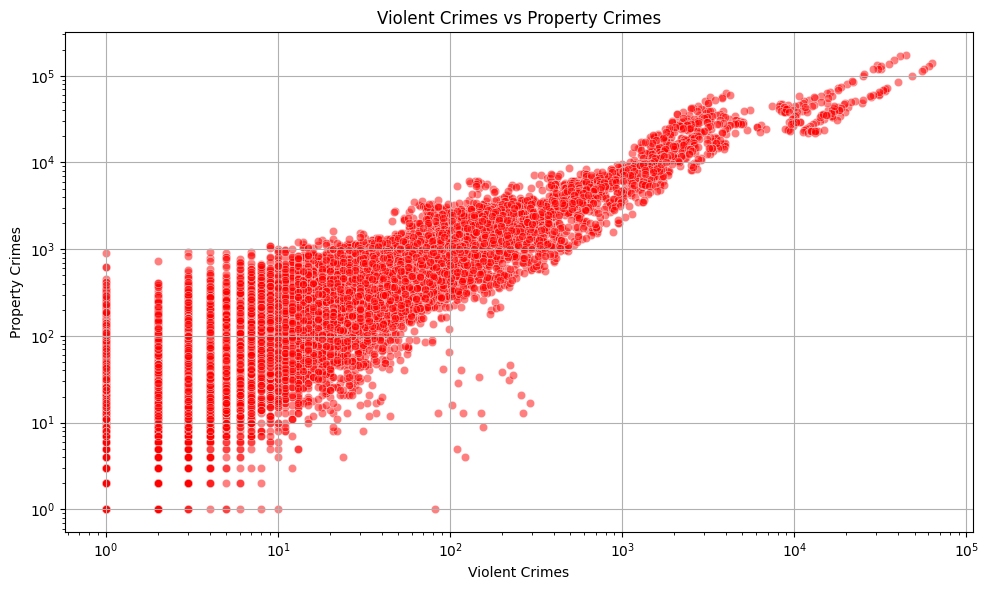

In [38]:
# Scatter Plot: Comparison of Violent vs Property Crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Violent Total', y='Property Total', data=df, color='r', alpha=0.5)
plt.title('Violent Crimes vs Property Crimes')
plt.xlabel('Violent Crimes')
plt.ylabel('Property Crimes')
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()